## Context 

This data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey 
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .
As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice, almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. 


## Importation of data and first glimpse of it 

In [390]:
import numpy as np 
import pandas as pd 

# for data visualization
import seaborn as sns 
import matplotlib.pylab as plt

# for the pre-processing of the data
from sklearn.preprocessing import StandardScaler

# for machine learning models 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# for the metrics of machine learning models 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.model_selection import KFold

# others 
import time
import random

In [391]:
pulsar_stars = pd.read_csv("pulsar_stars.csv")

# to check if we have to clean the data 
print(pulsar_stars.apply(pd.Series.count))

 Mean of the integrated profile                  17898
 Standard deviation of the integrated profile    17898
 Excess kurtosis of the integrated profile       17898
 Skewness of the integrated profile              17898
 Mean of the DM-SNR curve                        17898
 Standard deviation of the DM-SNR curve          17898
 Excess kurtosis of the DM-SNR curve             17898
 Skewness of the DM-SNR curve                    17898
target_class                                     17898
dtype: int64


### Then, we have a look on our data, the different features that describe an observation

In [392]:
pulsar_stars.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [393]:
pulsar_stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


First we need to split our data to train and test. 

In [394]:
# we set the seed for the random cursor
random.seed(10)

# we split the data
X = pulsar_stars.drop(['target_class'], axis = 1)
y = pulsar_stars['target_class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state = 10)
X_columns = X_train.columns

We can have a look on the importance of each feature

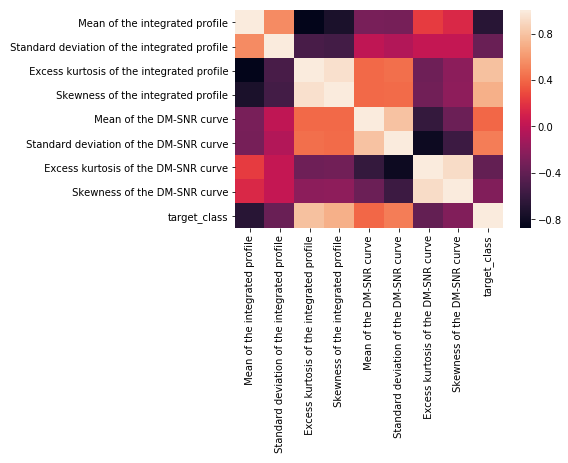

In [395]:
#correlation plot
corr = pulsar_stars.corr()
sns.heatmap(corr)

We can see that the excess kurtosis of the integrated profile is the more correlated feature with the target_class. 
Let's visualize this variable. 

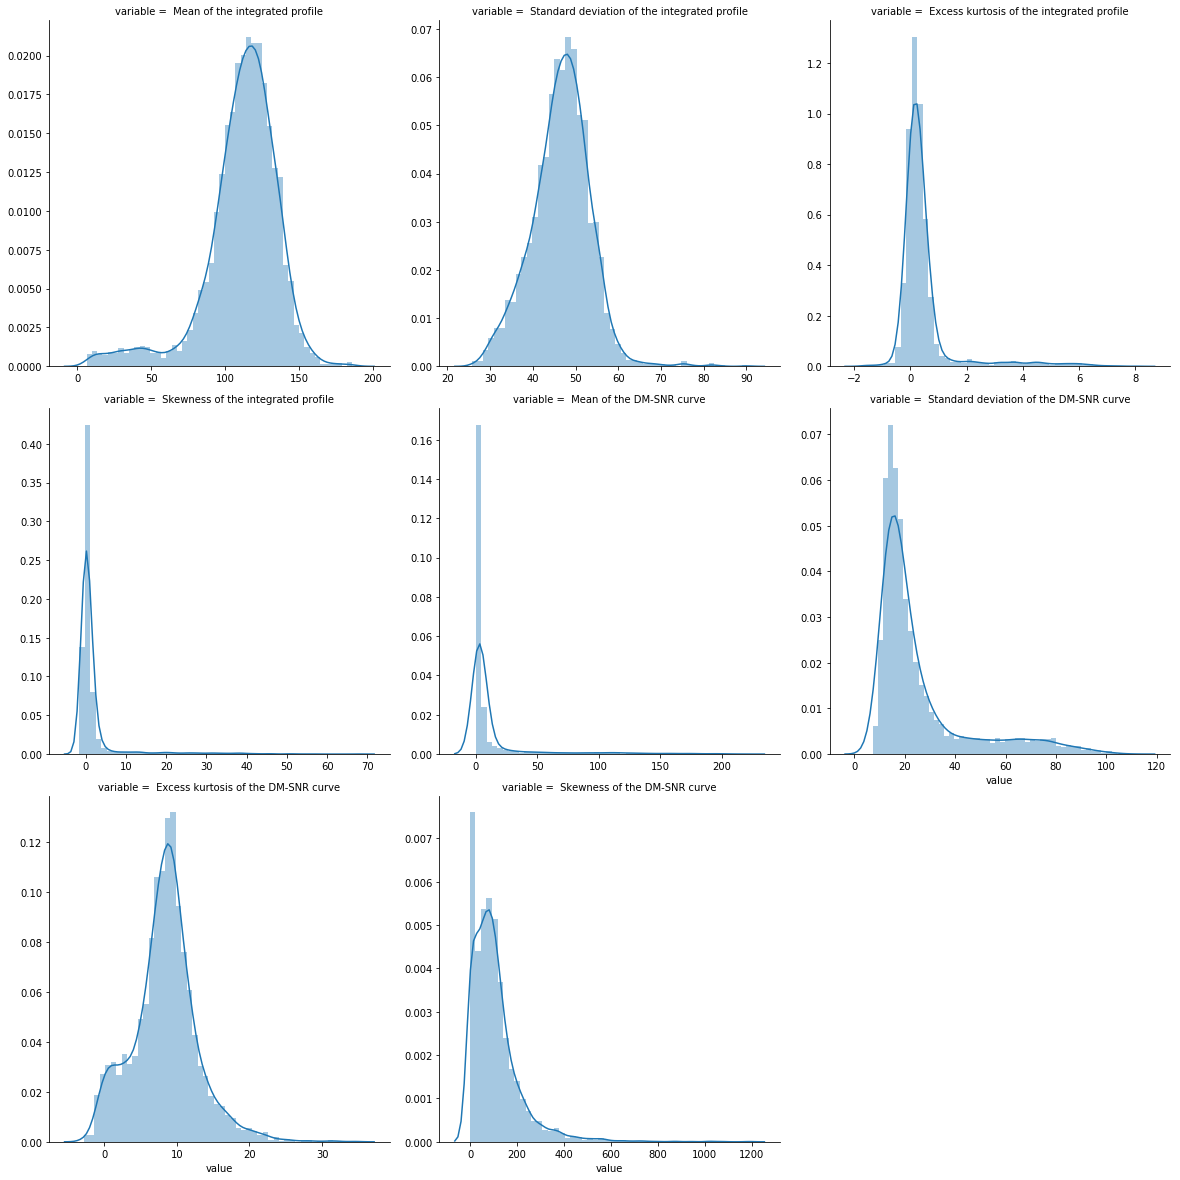

In [396]:
#create numeric plots
num = [f for f in X_train.columns if X_train.dtypes[f] != 'object']
nd = pd.melt(X_train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, height = 5.5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

As you can see, most of the variables are right skewed but we will still have to make some transformations for the others

# Pre-processing of the data 

The encoding is already done, we need to do the normalization. There are multiple ways to normalize our data. We can use MinMaxScaler where $X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$ or StandardScaler where $X_{scaled} = \frac{X - \mu}{\sigma}$ where $\mu$ is the mean and $\sigma$ the standard deviation. 

In [397]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [398]:
X_train = pd.DataFrame(X_train, columns = X_columns)
X_test = pd.DataFrame(X_test, columns = X_columns)

# Implementation of the different models 

We start by creating a dataframe that will sum up the properties of each model 

In [399]:
columns = ['Decision_tree', 'Logistic_regression', 'Random_forest', 'K-NNeighbors', 'neural_network']
index = ['time(s)', 'accuracy', 'recall', 'f1_score_weighted', 'AUC']
performance_df = pd.DataFrame(columns = columns, index = index)

#### Once we have see what the data looks like, as our objective is to predict of a star is a pulsar star or not we need to implement a classification machine learning algorithm. 
#### But, as they are a lot of them, we need to test different algorithm and see which one gives the best results. Thus, we need to introduce some metrics as the score of the confusion matrix 

In [400]:
# now we don't touch anymore to the test_set and we will use the ML algorithm to cluster : K-means, RandomForestCluster
# KNeighborsClassifier, AdaBoostClassifier, LogisticRegression, DecisionTreeClassifier and VotingClassifier to take the best of
# each model 

In [401]:


# we start by DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth = 4)
dc.fit(X_train, y_train)

params = {'max_depth' : [2,4,8]}
dcgrid = GridSearchCV(estimator = dc, param_grid = params, cv = KFold(5, random_state = 10) , scoring = 'accuracy')
dcgrid.fit(X_train, y_train)


# Then by LogisticRegression

lg = LogisticRegression(C=0.001, solver='liblinear')
lg.fit(X_train, y_train)

params = {'C':[0.01,0.1,1,10]}
lggrid = GridSearchCV(estimator = lg, param_grid = params, cv = KFold(5, random_state = 10), scoring = 'accuracy')
lggrid.fit(X_train, y_train)


# then by RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth = 10)
rf.fit(X_train, y_train)

params = {'n_estimators' : [10, 20, 50, 100], 'max_depth' : [10, 50]}
rfgrid = GridSearchCV(estimator = rf, param_grid = params, cv = KFold(5, random_state = 10), scoring = 'accuracy')
rfgrid.fit(X_train, y_train)


# then KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 10, p = 2)
kn.fit(X_train, y_train)

params = {'n_neighbors' : [2, 5, 10, 50], 'weights' : ['uniform', 'distance'], 'p' :[1,2]}
kngrid = GridSearchCV(estimator = kn, param_grid = params, cv = KFold(5, random_state = 10), scoring = 'accuracy')
kngrid.fit(X_train, y_train)


/Users/jonathanleban/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jonathanleban/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jonathanleban/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jonathanleban/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWa

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 5, 10, 50], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

#### We can see that the time to train the model is not the same for every model and in some situation it is an element that we need to take into account because we may have to train the model every second for example. 
#### Without surprise, the decision tree classifier and the logistic regression are the fastest ones. 

In [402]:
# we define the best models 
dc_best = dcgrid.best_estimator_
lg_best = lggrid.best_estimator_
rf_best = rfgrid.best_estimator_
kn_best = kngrid.best_estimator_



# now we will launch each model and see the time and the performance of each 
start = time.time()

dc = dc_best
dc_best.fit(X_train, y_train)

end = time.time()
print('time for Decision Tree Classifier = ', end - start, 's')
performance_df['Decision_tree']['time(s)'] = end - start

# Then by LogisticRegression
start = time.time()

lg = lg_best
lg_best.fit(X_train, y_train)

end = time.time()
print('time for Logisitic Regression= ', end - start, 's')
performance_df['Logistic_regression']['time(s)'] = end - start


# then by RandomForestClassifier
start = time.time()

rf = rf_best
rf_best.fit(X_train, y_train)

end = time.time()
print('time for Random Forst Classifier = ', end - start, 's')
performance_df['Random_forest']['time(s)'] = end - start


# then KNeighborsClassifier
start = time.time()

kn = kn_best
kn_best.fit(X_train, y_train)

end = time.time()
print('time for K_Neighbors Classifier = ', end - start,'s')
performance_df['K-NNeighbors']['time(s)'] = end - start


time for Decision Tree Classifier =  0.015055179595947266 s
time for Logisitic Regression=  0.00787496566772461 s
time for Random Forst Classifier =  0.24594998359680176 s
time for K_Neighbors Classifier =  0.003182649612426758 s


In [404]:
# we will calculate the scores of each model 
y_predict_dc = dc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_dc)
recall = recall_score(y_test, y_predict_dc)
performance_df['Decision_tree']['accuracy'] = accuracy
performance_df['Decision_tree']['recall'] = recall

y_predict_lg = lg_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_lg)
recall = recall_score(y_test, y_predict_lg)
performance_df['Logistic_regression']['accuracy'] = accuracy
performance_df['Logistic_regression']['recall'] = recall

y_predict_rf = dc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_rf)
recall = recall_score(y_test, y_predict_rf)
performance_df['Random_forest']['accuracy'] = accuracy
performance_df['Random_forest']['recall'] = recall

y_predict_kn = dc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_kn)
recall = recall_score(y_test, y_predict_kn)
performance_df['K-NNeighbors']['accuracy'] = accuracy
performance_df['K-NNeighbors']['recall'] = recall

#### After training the algorithm and make some prediction based on a prelimnary cross validation process, we can measure the score of each model which is an indicator of the accuracy of the model. 
#### In this situation, the Decision Tree Classifier, the logistic regression and the random forest gives roughly the same result. Only the K-Neigbors Classifier gives less good results. 

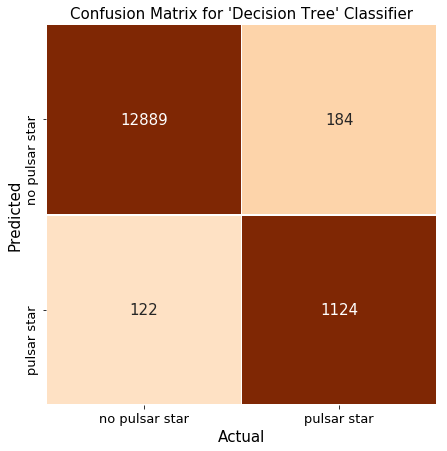


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13011
           1       0.90      0.86      0.88      1308

    accuracy                           0.98     14319
   macro avg       0.94      0.92      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [405]:
# generate confusion matrix for Decision Tree classifier
conf_mat_dc = confusion_matrix(y_test, y_predict_dc)
# put it into a dataframe for seaborn plot function
conf_math_dc_df = pd.DataFrame(conf_mat_dc)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_dc_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Decision Tree' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_dc))

performance_df['Decision_tree']['f1_score_weighted'] = f1_score(y_test, y_predict_dc, average = 'weighted')

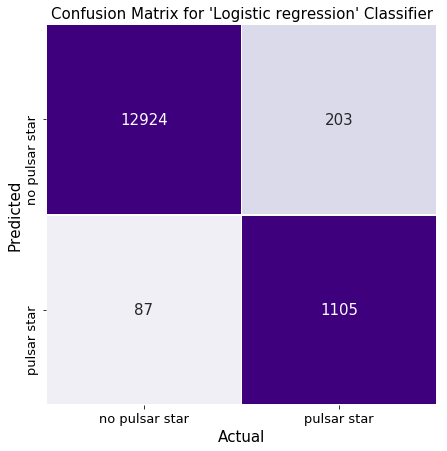


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13011
           1       0.93      0.84      0.88      1308

    accuracy                           0.98     14319
   macro avg       0.96      0.92      0.94     14319
weighted avg       0.98      0.98      0.98     14319



In [406]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test, y_predict_lg)
# put it into a dataframe for seaborn plot function
conf_math_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Logistic regression' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_lg))


performance_df['Logistic_regression']['f1_score_weighted'] = f1_score(y_test, y_predict_lg, average = 'weighted')


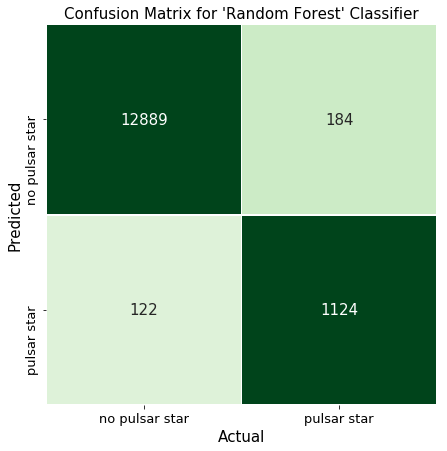


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13011
           1       0.90      0.86      0.88      1308

    accuracy                           0.98     14319
   macro avg       0.94      0.92      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [407]:
# generate confusion matrix for Random Forest classifier
conf_mat_rf = confusion_matrix(y_test, y_predict_rf)
# put it into a dataframe for seaborn plot function
conf_math_rf_df = pd.DataFrame(conf_mat_rf)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_rf_df.T, annot=True, annot_kws={"size": 15}, cmap="Greens", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Random Forest' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_rf))

performance_df['Random_forest']['f1_score_weighted'] = f1_score(y_test, y_predict_rf, average = 'weighted')


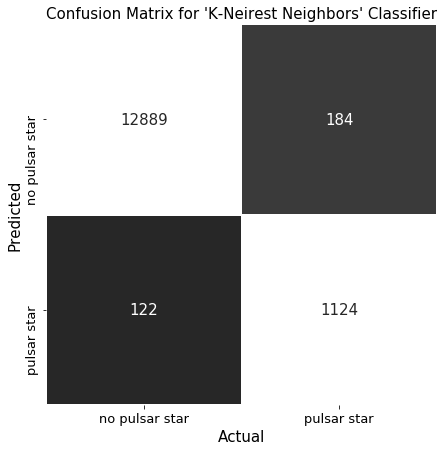


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13011
           1       0.90      0.86      0.88      1308

    accuracy                           0.98     14319
   macro avg       0.94      0.92      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [408]:
# generate confusion matrix for K-Neirest Neighbors classifier
conf_mat_kn = confusion_matrix(y_test, y_predict_kn)
# put it into a dataframe for seaborn plot function
conf_math_kn_df = pd.DataFrame(conf_mat_kn)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_kn_df.T, annot=True, annot_kws={"size": 15}, cmap="gray", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'K-Neirest Neighbors' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_kn))


performance_df['K-NNeighbors']['f1_score_weighted'] = f1_score(y_test, y_predict_kn, average = 'weighted')


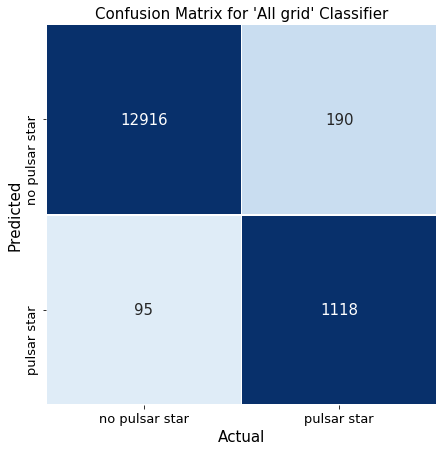


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13011
           1       0.92      0.85      0.89      1308

    accuracy                           0.98     14319
   macro avg       0.95      0.92      0.94     14319
weighted avg       0.98      0.98      0.98     14319



In [409]:
y_predict_all = allgrid.predict(X_test)
# generate confusion matrix for Allgrid classifier
conf_mat_all = confusion_matrix(y_test, y_predict_all)
# put it into a dataframe for seaborn plot function
conf_math_all_df = pd.DataFrame(conf_mat_all)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_all_df.T, annot=True, annot_kws={"size": 15}, cmap="Blues", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'All grid' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_all))


### Plotting the ROC Curve and AUC value: 
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

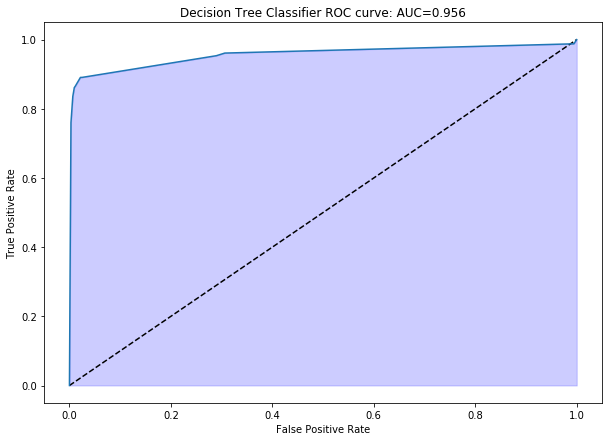

In [410]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
dc_best_prob = dc_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, dc_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, dc_best_prob[:, 1])
plt.title('Decision Tree Classifier ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['Decision_tree']['AUC'] = AUC

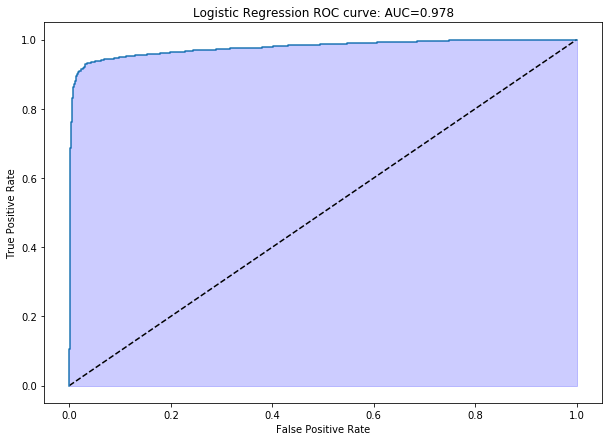

In [411]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
lg_best_prob = lg_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, lg_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, lg_best_prob[:, 1])
plt.title('Logistic Regression ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['Logistic_regression']['AUC'] = AUC

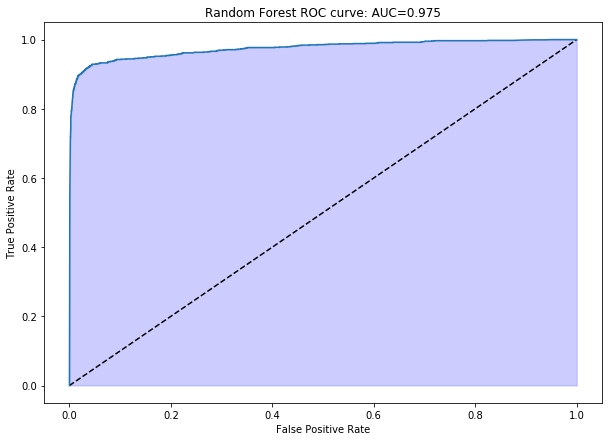

In [412]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
rf_best_prob = rf_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, rf_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, rf_best_prob[:, 1])
plt.title('Random Forest ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['Random_forest']['AUC'] = AUC

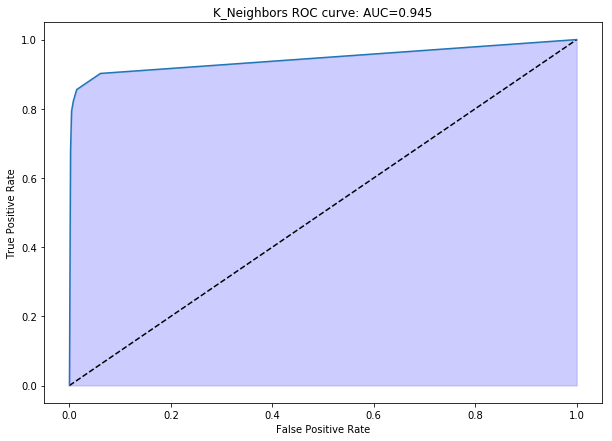

In [413]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
kn_best_prob = kn_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, kn_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, kn_best_prob[:, 1])
plt.title('K_Neighbors ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['K-NNeighbors']['AUC'] = AUC

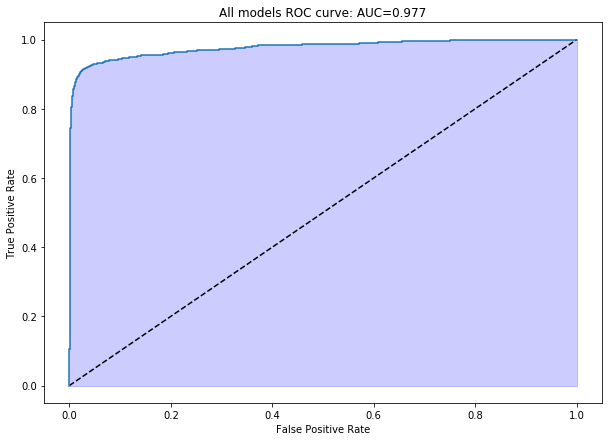

In [414]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
allgrid_prob = allgrid.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, allgrid_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All models ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y_test, allgrid_prob[:, 1])))
plt.show()

#### And finally we can plot the AUC indicator for each model. In this situation, the logistic regression algorithm  seems to give the best result too. 

Now we will implement a neural networks to compare the performance. 

In [415]:
input_dim = len(X_train.columns)

In [416]:
import keras
from keras.models import Sequential
from keras.layers import Dense


# Neural network
start_1 = time.time()
model = Sequential()
model.add(Dense(16, input_dim = input_dim, activation= 'relu'))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
end_1 = time.time()
time_tot = end_1 - start_1

Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.
model.add is used to add a layer to our neural network. We need to specify as an argument what type of layer we want. The Dense is used to specify the fully connected layer. The arguments of Dense are output dimension which is 16 in the first case, input dimension which is 8 for input dimension and the activation function to be used which is relu in this case. The second layer is similar, we dont need to specify input dimension as we have defined the model to be sequential so keras will automatically consider input dimension to be same as the output of last layer i.e 16. In the third layer(output layer) the output dimension is 1(number of classes). 
Now we need to specify the loss function and the optimizer. It is done using compile function in keras.

In [417]:
start_2 = time.time()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
end_2 = time.time()
time_tot += end_2 - start_2

Now we are done with building a neural network and we will train it.

In [418]:
start_3 = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=64)
end_3 = time.time()
time_tot += end_3 - start_3
performance_df['neural_network']['time(s)'] = time_tot

Epoch 1/100
3579/3579 [==============================] - 0s 67us/step - loss: 0.5727 - accuracy: 0.8304
Epoch 2/100
3579/3579 [==============================] - 0s 25us/step - loss: 0.3432 - accuracy: 0.9679
Epoch 3/100
3579/3579 [==============================] - 0s 22us/step - loss: 0.1853 - accuracy: 0.9712
Epoch 4/100
3579/3579 [==============================] - 0s 16us/step - loss: 0.1204 - accuracy: 0.9723
Epoch 5/100
3579/3579 [==============================] - 0s 21us/step - loss: 0.0992 - accuracy: 0.9743
Epoch 6/100
3579/3579 [==============================] - 0s 19us/step - loss: 0.0913 - accuracy: 0.9743
Epoch 7/100
3579/3579 [==============================] - 0s 21us/step - loss: 0.0874 - accuracy: 0.9757
Epoch 8/100
3579/3579 [==============================] - 0s 20us/step - loss: 0.0852 - accuracy: 0.9765
Epoch 9/100
3579/3579 [==============================] - 0s 20us/step - loss: 0.0837 - accuracy: 0.9765
Epoch 10/100
3579/3579 [==============================] - 0s 20u

3579/3579 [==============================] - 0s 19us/step - loss: 0.0681 - accuracy: 0.9818
Epoch 80/100
3579/3579 [==============================] - 0s 19us/step - loss: 0.0675 - accuracy: 0.9824
Epoch 81/100
3579/3579 [==============================] - 0s 17us/step - loss: 0.0674 - accuracy: 0.9821
Epoch 82/100
3579/3579 [==============================] - 0s 22us/step - loss: 0.0674 - accuracy: 0.9818
Epoch 83/100
3579/3579 [==============================] - 0s 28us/step - loss: 0.0674 - accuracy: 0.9821
Epoch 84/100
3579/3579 [==============================] - 0s 25us/step - loss: 0.0673 - accuracy: 0.9821
Epoch 85/100
3579/3579 [==============================] - 0s 20us/step - loss: 0.0670 - accuracy: 0.9821
Epoch 86/100
3579/3579 [==============================] - 0s 19us/step - loss: 0.0668 - accuracy: 0.9824
Epoch 87/100
3579/3579 [==============================] - 0s 18us/step - loss: 0.0668 - accuracy: 0.9821
Epoch 88/100
3579/3579 [==============================] - 0s 18us/st

Here we need to specify the input data-> X_train, labels-> y_train, number of epochs(iterations), and batch size. It returns the history of model training. History consists of model accuracy and losses after each epoch. We will visualize it later.
Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

In [419]:
eval_model = model.evaluate(X_train, y_train)
print("")
print('The loss is {} and the accuracy is {}'.format(eval_model[0], eval_model[1]))

3579/3579 [==============================] - 0s 22us/step

The loss is 0.06507092409957951 and the accuracy is 0.9823973178863525


We now predict the output for our test dataset. If the prediction is greater than 0.8 then the output is 1 else the output is 0

In [420]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.8)

accuracy = accuracy_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
performance_df['neural_network']['accuracy'] = accuracy
performance_df['neural_network']['recall'] = recall

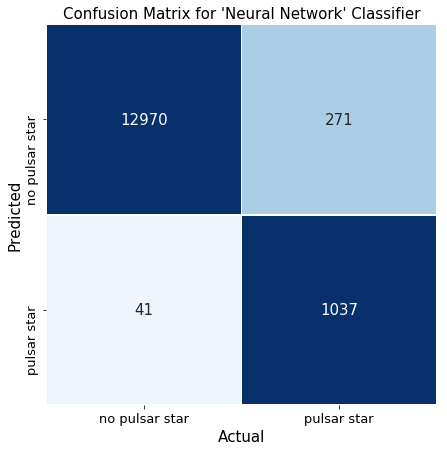


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13011
           1       0.96      0.79      0.87      1308

    accuracy                           0.98     14319
   macro avg       0.97      0.89      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [421]:
# generate confusion matrix for Neural Network classifier
conf_nn = confusion_matrix(y_test, y_pred_nn)
# put it into a dataframe for seaborn plot function
conf_nn_df = pd.DataFrame(conf_nn)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_nn_df.T, annot=True, annot_kws={"size": 15}, cmap="Blues", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Neural Network' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_pred_nn))

performance_df['neural_network']['f1_score_weighted'] = f1_score(y_test, y_predict_kn, average = 'weighted')


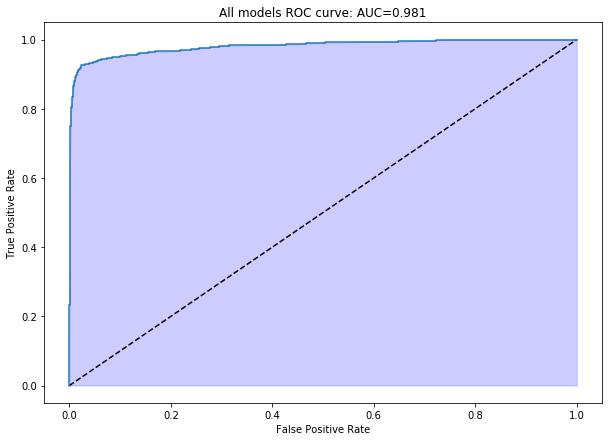

In [422]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
nn_prob = model.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, nn_prob)


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, nn_prob)
plt.title('All models ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['neural_network']['AUC'] = AUC

## Conclusion about the choosen algorithm to predict the pulsar stars 

In [423]:
performance_df

,Decision_tree,Logistic_regression,Random_forest,K-NNeighbors,neural_network
time(s),0.0150552,0.00787497,0.24595,0.00318265,9.57943
accuracy,0.97863,0.979747,0.97863,0.97863,0.978211
recall,0.859327,0.844801,0.859327,0.859327,0.792813
f1_score_weighted,0.978396,0.979322,0.978396,0.978396,0.978396
AUC,0.956091,0.977595,0.974839,0.944691,0.98106


#### Depending on our problem, the metrics don't have the same weight on our reuslt. The AUC score is the most important metric in our model as predicting a star as a non super stard and make a mistake is what we want to avoid. 

#### If we take the second best model, which is not a neural network we can vet the importance of the different features

In [424]:
# thus the logistic regression is the best model : we will keep it 
# maintenant on veut regarder l'importance de chaque feature 
dataframe_importance = pd.DataFrame()
columns = X_train.columns
importances = np.abs(lg_best.coef_[0])

for i in range(len(columns)):
    dataframe_importance[columns[i]] = [importances[i]]

dataframe_importance.insert(0, '', 'Importance features')
dataframe_importance.head(10)


,,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,Importance features,0.519119,0.002811,6.294142,2.779748,0.49189,1.072914,0.988323,1.197186


#### We can also check which feature has the most impact on the prediction of pulsar stars. It seems that the excess kurtosis of the integrated profile has the most influence on the result. 
#### The kurtosis is a measure of whether the distribution is too peaked and thus conditionned the result. 

# Now we will do a feature selection and see the impact on the result

In [463]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# we split the data
X = pulsar_stars.drop(['target_class'], axis = 1)
y = pulsar_stars['target_class']

min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X)

X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X, y)



In [464]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size = 0.8, random_state = 10)

In [465]:
columns = ['chi2', 'PCA']
index = ['time(s)', 'accuracy', 'recall', 'f1_score_weighted', 'AUC']
performance_select_df = pd.DataFrame(columns = columns, index = index)

In [466]:
lg = LogisticRegression(C=0.001, solver='liblinear')
lg.fit(X_train, y_train)

params = {'C':[0.01,0.1,1,10]}
lggrid = GridSearchCV(estimator = lg, param_grid = params, cv = KFold(5, random_state = 10), scoring = 'accuracy')
lggrid.fit(X_train, y_train)

lg_best = lggrid.best_estimator_

/Users/jonathanleban/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [467]:
start = time.time()

lg = lg_best
lg_best.fit(X_train, y_train)

end = time.time()
print('time for Logisitic Regression= ', end - start, 's')
performance_select_df['chi2']['time(s)'] = end - start


time for Logisitic Regression=  0.005948066711425781 s


In [468]:
y_predict_lg = lg_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_lg)
recall = recall_score(y_test, y_predict_lg)
performance_select_df['chi2']['accuracy'] = accuracy
performance_select_df['chi2']['recall'] = recall

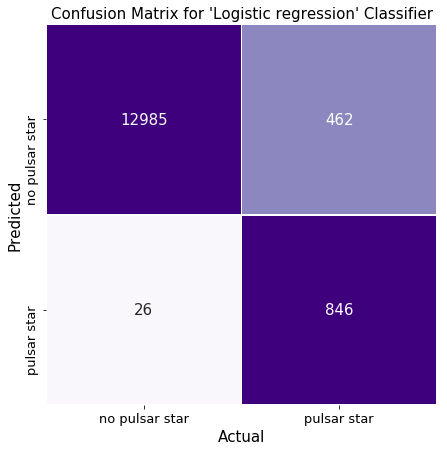


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13011
           1       0.97      0.65      0.78      1308

    accuracy                           0.97     14319
   macro avg       0.97      0.82      0.88     14319
weighted avg       0.97      0.97      0.96     14319



In [469]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test, y_predict_lg)
# put it into a dataframe for seaborn plot function
conf_math_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Logistic regression' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_lg))


performance_select_df['chi2']['f1_score_weighted'] = f1_score(y_test, y_predict_lg, average = 'weighted')


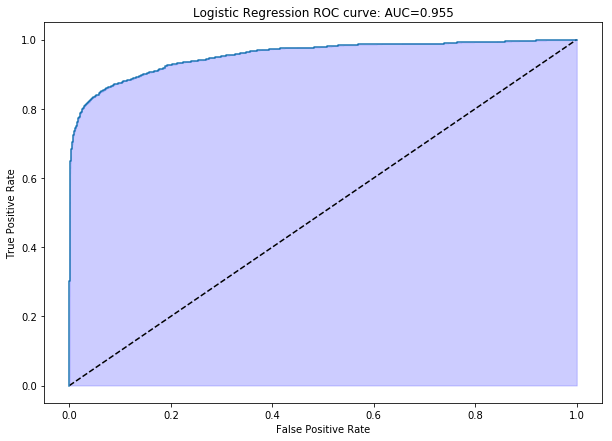

In [470]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
lg_best_prob = lg_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, lg_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, lg_best_prob[:, 1])
plt.title('Logistic Regression ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_select_df['chi2']['AUC'] = AUC

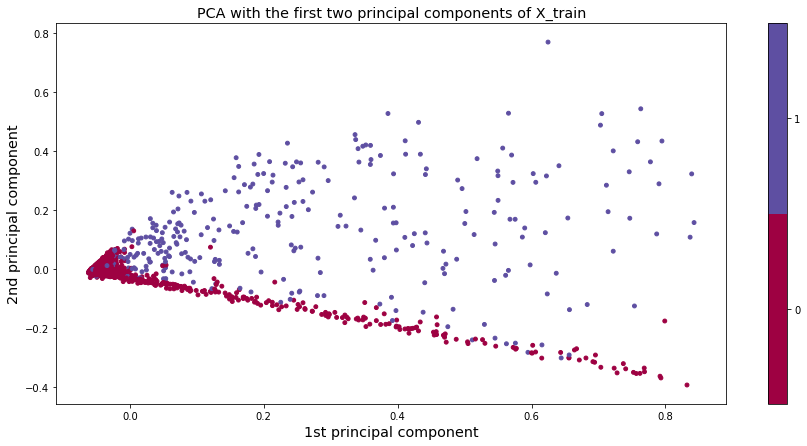

In [471]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

plt.figure(figsize = (15, 7))
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c = y_train , cmap='Spectral', s=15)

plt.xlabel("1st principal component",fontsize='x-large')
plt.ylabel("2nd principal component",fontsize='x-large')
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
plt.title('PCA with the first two principal components of X_train',fontsize='x-large')
plt.show()

In [472]:
lg = LogisticRegression(C=0.001, solver='liblinear')
lg.fit(X_train_PCA, y_train)

params = {'C':[0.01,0.1,1,10]}
lggrid = GridSearchCV(estimator = lg, param_grid = params, cv = KFold(5, random_state = 10), scoring = 'accuracy')
lggrid.fit(X_train_PCA, y_train)

lg_best = lggrid.best_estimator_

start = time.time()

lg = lg_best
lg_best.fit(X_train_PCA, y_train)

end = time.time()
print('time for Logisitic Regression= ', end - start, 's')
performance_select_df['PCA']['time(s)'] = end - start


time for Logisitic Regression=  0.003216266632080078 s


/Users/jonathanleban/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [473]:
y_predict_lg = lg_best.predict(X_test_PCA)
accuracy = accuracy_score(y_test, y_predict_lg)
recall = recall_score(y_test, y_predict_lg)
performance_select_df['PCA']['accuracy'] = accuracy
performance_select_df['PCA']['recall'] = recall

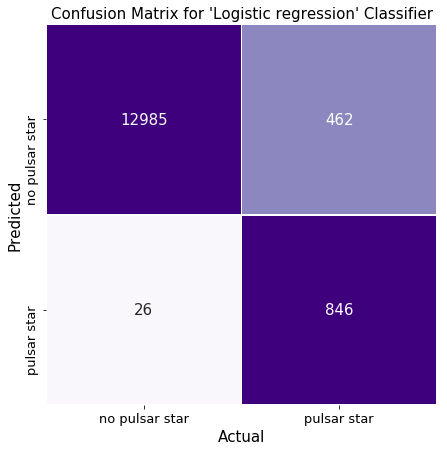


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13011
           1       0.97      0.65      0.78      1308

    accuracy                           0.97     14319
   macro avg       0.97      0.82      0.88     14319
weighted avg       0.97      0.97      0.96     14319



In [474]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test, y_predict_lg)
# put it into a dataframe for seaborn plot function
conf_math_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Logistic regression' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_lg))


performance_select_df['PCA']['f1_score_weighted'] = f1_score(y_test, y_predict_lg, average = 'weighted')


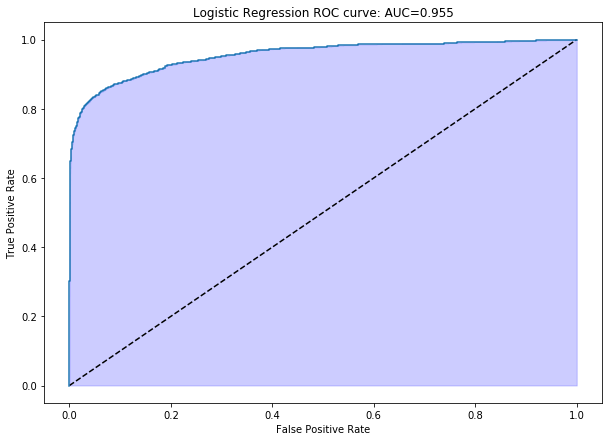

In [475]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
lg_best_prob = lg_best.predict_proba(X_test_PCA)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, lg_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, lg_best_prob[:, 1])
plt.title('Logistic Regression ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_select_df['PCA']['AUC'] = AUC

In [479]:
print("Performance with Logistic Regression applying feauture selection")
performance_select_df

Performance with Logistic Regression applying feauture selection


,chi2,PCA
time(s),0.00594807,0.00321627
accuracy,0.965919,0.965919
recall,0.646789,0.646789
f1_score_weighted,0.962792,0.962792
AUC,0.954912,0.954912


In [480]:
performance_df

,Decision_tree,Logistic_regression,Random_forest,K-NNeighbors,neural_network
time(s),0.0150552,0.00787497,0.24595,0.00318265,9.57943
accuracy,0.97863,0.979747,0.97863,0.97863,0.978211
recall,0.859327,0.844801,0.859327,0.859327,0.792813
f1_score_weighted,0.978396,0.979322,0.978396,0.978396,0.978396
AUC,0.956091,0.977595,0.974839,0.944691,0.98106


We can see that the performance are higher when the feature selection is not done but the AUC score is only 2.5% less than the score without the feature selection. But, the speed of the model is much high when using PCA or chi2 compare to the full model. This is not astonishing in this project as in the full model there are 8 features and in the PCA model 2 features. The difference will be more noticeable if the initial model would has had hundred of features. 